# HLMA 408: Lois gaussiennes et visualisation interactive

***
> __Auteur__: Joseph Salmon <joseph.salmon@umontpellier.fr>

In [1]:
%matplotlib inline
from download import download
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm, t, f
from ipywidgets import interact, IntSlider  # widget manipulation
import seaborn as sns

In [2]:
sns.set_context("paper", font_scale=1)
sns.set_style("ticks")
sns.set_palette("colorblind")

In [3]:
dirname = "../prebuiltimages/"
imageformat = ".pdf"

In [4]:
# to use the default values of utils for instance
saving = False
path_target = "./utils.py"
url_shared_files = "http://josephsalmon.eu/enseignement/Montpellier/HLMA408/sharedcode/utils.py"
download(url_shared_files, path_target, replace=False)
from utils import my_saving_display

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.



## Visualisation des densités de Student: impact du nombre de degrés de libertés

In [5]:
x = np.linspace(-5, 5, num=400)

In [6]:
def student_vis(df=5):
    """Visualize the Gaussian quantile"""
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
    ax1.plot(x, t.pdf(x, df=df), '-', lw=2, label=r"$t({0})$".format(df))
    ax1.plot(x, norm.pdf(x), '--',color='k', lw=1, label=r"$\varphi_{{0,1}}$")
    ax1.set_ylim(0, 0.6)
    ax1.set_title(r"Densité d'une loi de student en fonction du nombre de degrés de liberté:" + "\n" +
                  r"$n = {0}$".format(df), fontsize=10)
    plt.legend()
    my_saving_display(fig, dirname, "student"+str(df), imageformat, saving=saving)
    plt.show()

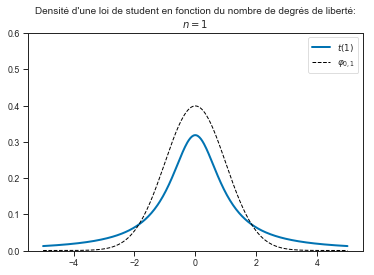

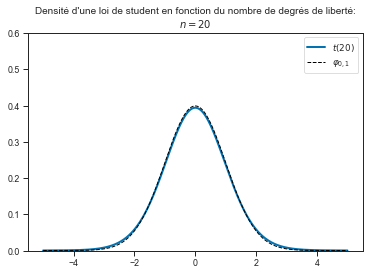

<function ipywidgets.widgets.interaction.interact.<locals>.dec>

In [7]:
interact(student_vis(df=1), df=(1, 20, 1))
interact(student_vis(df=20), df=(1, 20, 1))

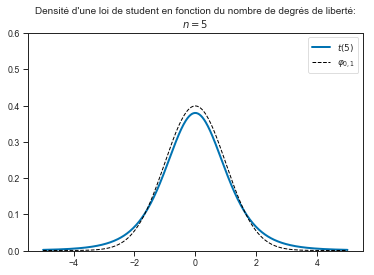

<function __main__.student_vis>

In [8]:
interact(student_vis, df=(1, 20, 1))

## Visualisation des quantiles gaussiens

In [9]:
def student_quantile(alpha=0.05, df=10):
    """Visualize Student quantiles"""

    quantile_up = t.ppf(1 - alpha / 2, df=df)
    quantile_down = -t.ppf(1 - alpha / 2, df=df)
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
    ax1.plot(x, t.pdf(x, df=df), '-', lw=2)
    ax1.set_ylim(0, 0.5)
    ax1.fill_between(x, 0, t.pdf(x, df=df), where=(quantile_down <= x) & (
        x <= quantile_up), color=sns.color_palette()[0])

#     ax1.fill_between(x, 0, t.pdf(x, df=10), where=x <= quantile)
#     plt.axvline(x=quantile, c='k', ls="--", lw=1)
    ax1.set_title(r"Aire $ \alpha = {0:.2f},$ $t_{{1-\alpha/2, n-1}}={1:.2f}$  $(n={2})$ ".format(1 - alpha, quantile_up, df), fontsize=10)
    plt.show()
    my_saving_display(fig, dirname, "student"+str(df)+"quantile", imageformat, saving=saving)
 

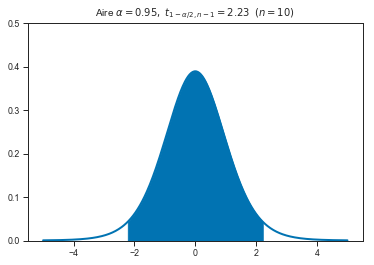

<function __main__.student_quantile>

In [10]:
interact(student_quantile, alpha=(0.001, .999, 0.001), df=(1, 20, 1))

In [11]:
# Figures pour les slides:

In [12]:
# to use the default values of utils for instance
saving = True
path_target = "./utils.py"
url_shared_files = "http://josephsalmon.eu/enseignement/Montpellier/HLMA408/sharedcode/utils.py"
download(url_shared_files, path_target, replace=False)
from utils import my_saving_display

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


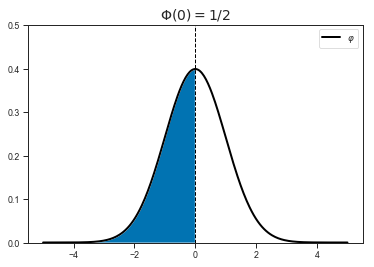

In [13]:
x = np.linspace(-5, 5, 300)

fig, ax1 = plt.subplots(1, 1)
ax1.plot(x, norm.pdf(x, 0, 1), 'k-', lw=2, label=r"$\varphi$")
ax1.set_ylim(0, 0.5)
ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x <= 0)
plt.axvline(x=0, c='k', ls="--", lw=1)
plt.title("$\Phi(0)=1/2$", fontsize=14)
plt.legend()
my_saving_display(fig, dirname, "Gaussian_phi0", imageformat, saving=saving)

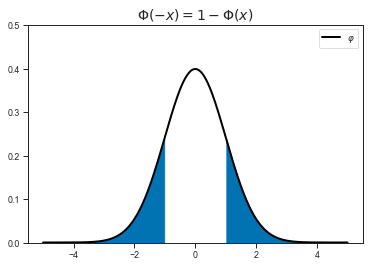

In [14]:
x = np.linspace(-5, 5, 300)

lim = 1
fig, ax1 = plt.subplots(1, 1)
ax1.plot(x, norm.pdf(x, 0, 1), 'k-', lw=2, label=r"$\varphi$")
ax1.set_ylim(0, 0.5)
ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x <= -
                 lim, color=sns.color_palette()[0])
ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x >=
                 lim, color=sns.color_palette()[0])
# plt.axvline(x=0, c='k', ls="--", lw=1)
plt.title("$\Phi(-x)=1-\Phi(x)$", fontsize=14)
plt.legend()
my_saving_display(fig, dirname, "Gaussian_phi_moins_x",
                  imageformat, saving=saving)

In [15]:
norm.cdf(1, 0, 1)-norm.cdf(-1, 0, 1)

0.6826894921370859

In [16]:
2 * norm.cdf(1, 0, 1)-1

0.6826894921370859

In [17]:
2 * norm.cdf(2, 0, 1)-1

0.9544997361036416

# Loi de Fisher

In [18]:
x_f = np.linspace(0, 8, 300)

def fisher_vis(df_1=16, df_2=8):
    """Visualize the Fisher distrubution."""
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
    ax1.plot(x_f, f.pdf(x_f, df_1, df_2), '-', lw=2, label=r"$f({0},{1})$".format(df_1,df_2))
    ax1.set_ylim(0, 1)
    ax1.set_title(r"Densité d'une loi de Fisher: " +
                  r"$F({0},{1})$".format(df_1, df_2), fontsize=10)
    plt.legend()
    my_saving_display(fig, dirname, "fisher" + str(df_1) + '_' +
                      str(df_2), imageformat, saving=saving)
    plt.show()

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


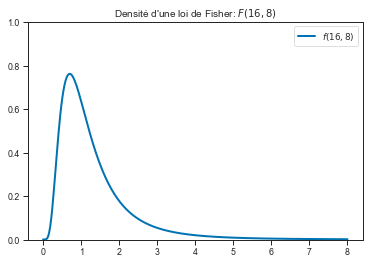

In [19]:
fisher_vis(df_1=16, df_2=8)

In [20]:
def fisher_quantile(alpha=0.2, df_1=16, df_2=8, saving=False):
    """Visualize Student quantiles"""

    quantile_up = f.ppf(1 - alpha / 2, df_1, df_2)
    quantile_down = f.ppf(alpha / 2, df_1, df_2)
    print(quantile_down, quantile_up)
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))

    ax1.plot(x_f, f.pdf(x_f, df_1, df_2), '-', lw=2)
    ax1.set_ylim(0, 1)
    ax1.fill_between(x_f, 0, f.pdf(x_f, df_1, df_2), where=(quantile_down <= x_f) & (
        x_f <= quantile_up), color=sns.color_palette()[0])
    ax1.set_title(r"Aire $ \alpha = {0:.2f},$ $f_{{1-\alpha/2}}(d_1-1,d_2-1)={1:.2f}$  $(d_1,d_2)=({2},{3}))$ ".format(
        1 - alpha, quantile_up, df_1, df_2), fontsize=10)
    plt.show()
    my_saving_display(fig, dirname, "fisher" + str(df_1) + '_' + str(df_2)
                      + "quantile", imageformat, saving=saving)

0.30326908902107147 2.521640686209624


/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


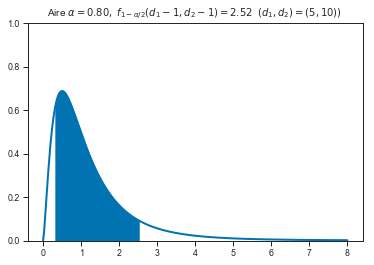

<function __main__.fisher_quantile>

In [21]:
interact(fisher_quantile, alpha=(0.001, .999, 0.001),
         df_1=IntSlider(min=1, max=20, step=1, value=5),
         df_2=IntSlider(min=1, max=20, step=1, value=10))

0.4789313659060369 2.4545005383925953


/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


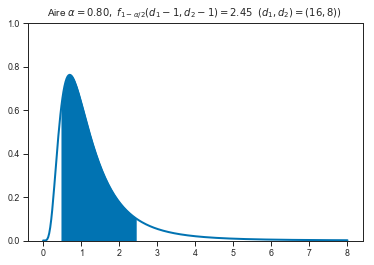

In [22]:
fisher_quantile(saving=True)